In [11]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

os.chdir('/home/yahwang/kaggle/bike')
%matplotlib inline
pd.options.display.max_rows = 10
plt.style.use("ggplot")
mpl.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.size"] = 10
plt.rcParams["font.family"] = 'NanumGothic'
# https://www.kaggle.com/c/bike-sharing-demand 데이터
train = pd.read_csv('bike_train.csv', parse_dates=['datetime'])

## 상관관계

In [3]:
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


## Heatmap

### seaborn heatmap

- annot : annotation(칸에 숫자 표시)
- vmin & vmax : 색 표현 범위의 최소 최대
- square : 정사각형 모양으로

In [4]:
# Diagonal Matrix로 만들기 위한 MASK 만들기
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False

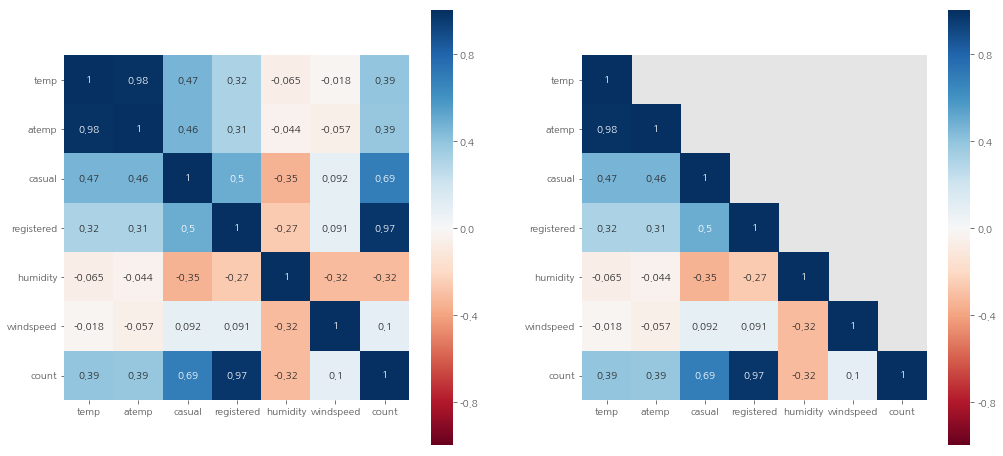

In [10]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(17,8))
sns.heatmap(corrMatt, vmin=-1, vmax=1, square=True, annot=True, cmap="RdBu" ,ax=axes[0])
sns.heatmap(corrMatt, mask=mask, vmin=-1, vmax=1, square=True, annot=True, cmap="RdBu", ax=axes[1]) # MASK 적용